In [33]:
import numpy as np
import matplotlib. pyplot as plt
import h5py
import os
from astropy.io import fits
from photutils import CircularAperture, CircularAnnulus, aperture_photometry

In [2]:
data_loc = '/Users/fardila/Documents/GitHub/MUSE/Data'

In [3]:
# Get the list of all files in directory tree at given path
mismatch_files = []
for (dirpath, dirnames, filenames) in os.walk(data_loc):
    mismatch_files += [dirpath+'/'+f for f in filenames if f.endswith('mismatch.fits')]
mismatch_files

['/Users/fardila/Documents/GitHub/MUSE/Data/PGC007748/PGC007748_mismatch.fits',
 '/Users/fardila/Documents/GitHub/MUSE/Data/PGC004500/PGC004500_mismatch.fits',
 '/Users/fardila/Documents/GitHub/MUSE/Data/PGC003342/PGC003342_mismatch.fits']

read in mismatch fits files. in circular annuli get average mismatch values. plot profile.

In [68]:
def get_1d_annulus_data(annulus_aperture, data):
    
    #get mask from aperture (1s and 0s)
    annulus_mask = annulus_aperture.to_mask(method='center')
    #multiply data by mask
    annulus_data = annulus_mask[0].multiply(data)
    
    #get mask data and use it to select unmasked data within annulus
    mask = annulus_mask[0].data
    annulus_data_1d = annulus_data[mask > 0]
    
    return annulus_data_1d

## PGC007748

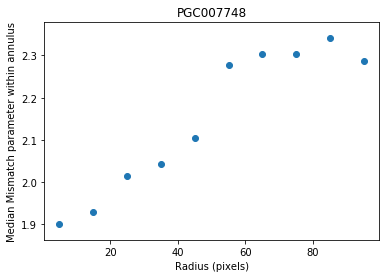

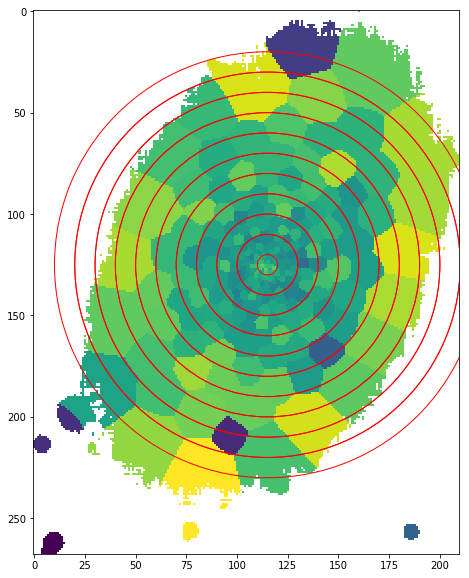

In [92]:
file=mismatch_files[0]
center =[115,125]
dr=10.
radii = np.arange(5,100,dr)
radii1 = radii

data = fits.open(file)[0].data

galaxy_name = file[42:51]
galaxy_name1 = galaxy_name

apertures = [CircularAnnulus(center, r_in=r, r_out=r+dr) for r in radii]
annulus_data_1d = [get_1d_annulus_data(aperture, data) for aperture in apertures]
medians = [np.nanmedian(data_1d) for data_1d in annulus_data_1d]
medians1 = medians

plt.scatter(radii,medians)

plt.xlabel('Radius (pixels)')
plt.ylabel('Median Mismatch parameter within annulus')
plt.title(galaxy_name)
plt.show()

plt.figure(figsize=[8,10])
plt.imshow(data)
for circular_ap in apertures:
    circular_ap.plot(color='r')
plt.show()

## PGC004500

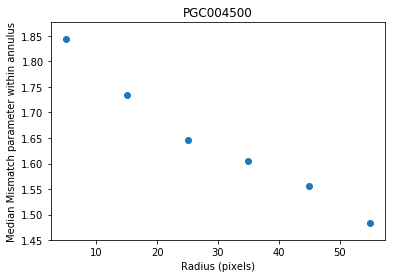

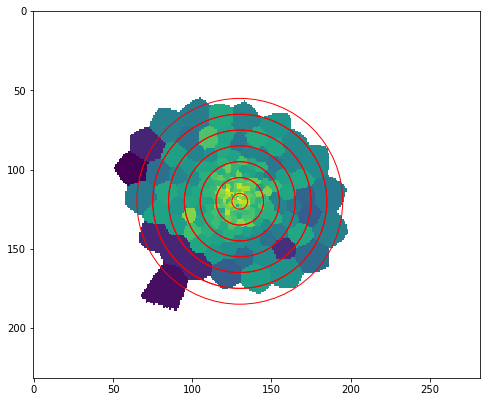

In [91]:
file=mismatch_files[1]

center =[130,120]
dr=10.
radii = np.arange(5,60,dr)
radii2 = radii

data = fits.open(file)[0].data

galaxy_name = file[42:51]
galaxy_name2 = galaxy_name

apertures = [CircularAnnulus(center, r_in=r, r_out=r+dr) for r in radii]
annulus_data_1d = [get_1d_annulus_data(aperture, data) for aperture in apertures]
medians = [np.nanmedian(data_1d) for data_1d in annulus_data_1d]
medians2 = medians

plt.scatter(radii,medians)

plt.xlabel('Radius (pixels)')
plt.ylabel('Median Mismatch parameter within annulus')
plt.title(galaxy_name)
plt.show()

plt.figure(figsize=[8,10])
plt.imshow(data)
for circular_ap in apertures:
    circular_ap.plot(color='r')
plt.show()

##  PGC003342

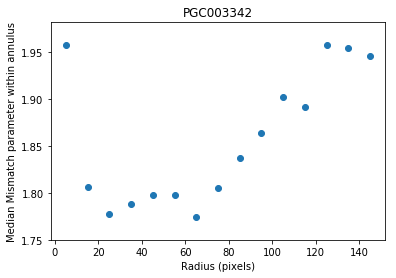

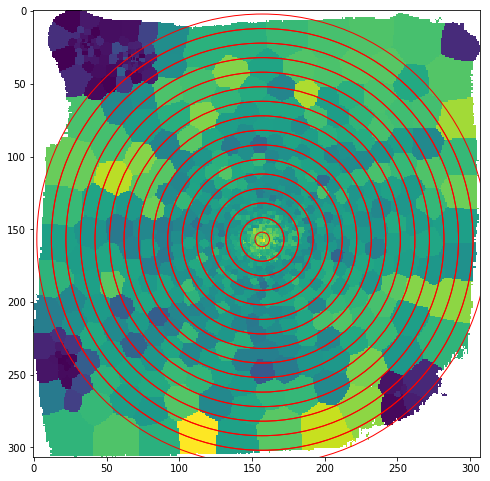

In [90]:
file=mismatch_files[2]

center =[157,157]
dr=10.
radii = np.arange(5,150,dr)
radii3=radii

data = fits.open(file)[0].data

galaxy_name = file[42:51]
galaxy_name3 = galaxy_name

apertures = [CircularAnnulus(center, r_in=r, r_out=r+dr) for r in radii]
annulus_data_1d = [get_1d_annulus_data(aperture, data) for aperture in apertures]
medians = [np.nanmedian(data_1d) for data_1d in annulus_data_1d]
medians3 = medians

plt.scatter(radii,medians)

plt.xlabel('Radius (pixels)')
plt.ylabel('Median Mismatch parameter within annulus')
plt.title(galaxy_name)
plt.show()

plt.figure(figsize=[8,10])
plt.imshow(data)
for circular_ap in apertures:
    circular_ap.plot(color='r')
plt.show()

### plot all 3 profile together 

In [104]:
#convert to physical units
from astropy.cosmology import WMAP9 as cosmo

pixel_scale = 0.2 #arcsec/pixel

redshift1 = 0.04276
redshift2 = 0.04490
redshift3 = 0.04446

pixel_to_kpc1 = pixel_scale * cosmo.kpc_proper_per_arcmin(redshift1)/60.
pixel_to_kpc2 = pixel_scale * cosmo.kpc_proper_per_arcmin(redshift2)/60.
pixel_to_kpc3 = pixel_scale * cosmo.kpc_proper_per_arcmin(redshift3)/60.

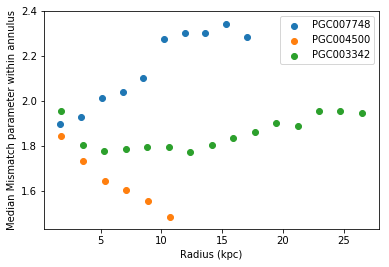

In [106]:
#the +5 is to put the point at the center of the radius bin
plt.scatter(pixel_to_kpc1*(radii1+5), medians1, label = galaxy_name1)
plt.scatter(pixel_to_kpc2*(radii2+5), medians2, label = galaxy_name2)
plt.scatter(pixel_to_kpc3*(radii3+5), medians3, label = galaxy_name3)

plt.xlabel('Radius (kpc)')
plt.ylabel('Median Mismatch parameter within annulus')
plt.legend()
plt.show()